# Marketing A/B testing dataset
Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process where in two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

Would the campaign be successful?
If the campaign was successful, how much of that success could be attributed to the ads?
With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

**Data dictionary:**

Index: Row index

user id: User ID (unique)

test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement

converted: If a person bought the product then True, else is False

total ads: Amount of ads seen by person

most ads day: Day that the person saw the biggest amount of ads

most ads hour: Hour of day that the person saw the biggest amount of ads

## Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Apresentando os dados

In [2]:
df = pd.read_csv('marketing_AB.csv')
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


## Tratando os dados

#### 1) Procurando valore duplicados na coluna "user id"

In [3]:
df.duplicated(subset='user id').sum()

0

#### 2) Eliminando as colunas: "Unnamed: 0" e "user id"

Unnamed: 0  - >  não faz referência a nada, é provavelmente uma coluna colocada de forma equivocada

user id  - >  não é interessante na análise em questão, não importando quem é o usuário, é só uma identificação

In [4]:
df.drop(columns=['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [5]:
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


## Análise Exploratória

#### 1) Quais os valores possíveis para cada atributo?

In [9]:
for i in df.drop(columns='total ads').columns:
    print(i.upper(), ":", df[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


#### 2) Qual a quantidade e porcentagem de pessoas que viram o ad e qual viu apenas o psa?

In [10]:
print('Quantidade de pessoas por grupo')
print(df['test group'].value_counts())
print('')
print('Porcentagem de pessoas por grupo')
print(df['test group'].value_counts(normalize=True))

Quantidade de pessoas por grupo
test group
ad     564577
psa     23524
Name: count, dtype: int64

Porcentagem de pessoas por grupo
test group
ad     0.96
psa    0.04
Name: proportion, dtype: float64


#### Respondendo graficamente

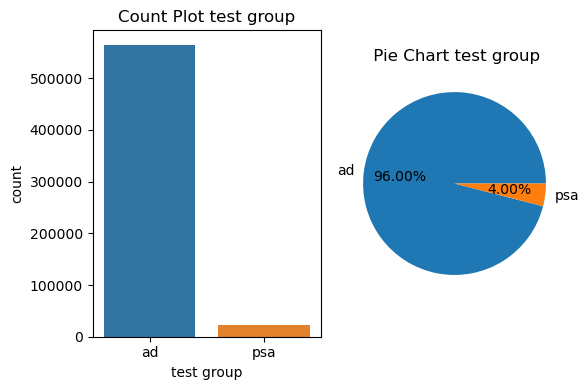

In [12]:
variable = 'test group'
plt.figure(figsize=(6,4))

# Count Plot 
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df)
plt.title(f'Count Plot {variable}')

# Pie Chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f' Pie Chart {variable}')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

#### 3) Qual a quantidade e porcentagem de pessoas que compraram um produto?

In [13]:
print('Quantidade de pessoas que comprou algum produto')
print(df['converted'].value_counts())
print('')
print('Porcentagem de pessoas que comprou algum produto')
print(df['converted'].value_counts(normalize=True))

Quantidade de pessoas que comprou algum produto
converted
False    573258
True      14843
Name: count, dtype: int64

Porcentagem de pessoas que comprou algum produto
converted
False    0.974761
True     0.025239
Name: proportion, dtype: float64


#### Respondendo Graficamente

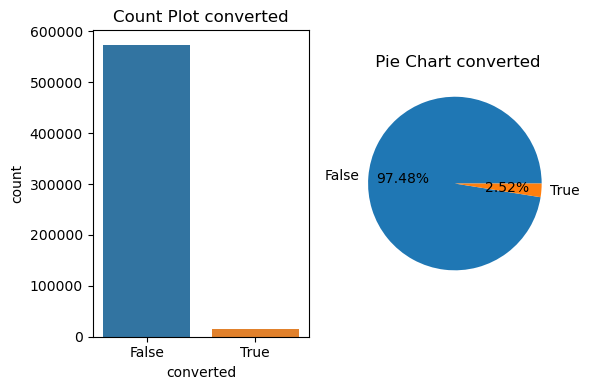

In [14]:
variable = 'converted'
plt.figure(figsize=(6,4))

# Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df)
plt.title(f'Count Plot {variable}')

# Pie Chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f' Pie Chart {variable}')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

#### 4) Qual a quantidade e porcentagem de ads por dia da semana?

In [16]:
print('Quantidade de anúncios por dia da semana')
print(df['most ads day'].value_counts())
print('')
print('Porcentagem de anúncios por dia da semana')
print(df['most ads day'].value_counts(normalize=True))

Quantidade de anúncios por dia da semana
most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64

Porcentagem de anúncios por dia da semana
most ads day
Friday       0.157470
Monday       0.148058
Sunday       0.145198
Thursday     0.141102
Saturday     0.138854
Wednesday    0.137575
Tuesday      0.131744
Name: proportion, dtype: float64


#### Respondendo Graficamente

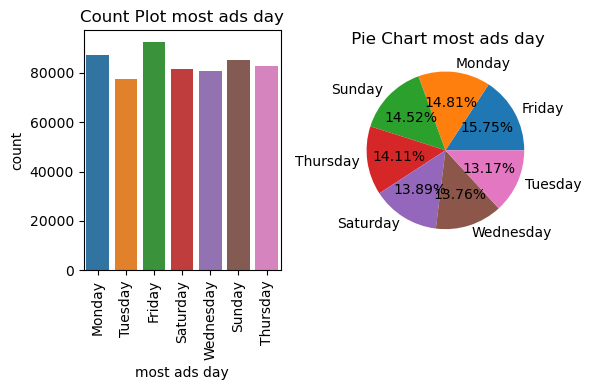

In [17]:
variable = 'most ads day'
plt.figure(figsize=(6,4))

# Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df)
plt.title(f'Count Plot {variable}')
plt.xticks(rotation = 90)

# Pie Chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f' Pie Chart {variable}')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

#### 5) Qual a quantidade e porcentagem de ads por hora do dia?

In [18]:
print('Quantidade de anúncios por hora do dia')
print(df['most ads hour'].value_counts())
print('')
print('Porcentagem de anúncios por hora do dia')
print(df['most ads hour'].value_counts(normalize=True))

Quantidade de anúncios por hora do dia
most ads hour
13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: count, dtype: int64

Porcentagem de anúncios por hora do dia
most ads hour
13    0.081032
12    0.080425
11    0.078575
14    0.077619
15    0.075978
10    0.066211
16    0.063878
17    0.059493
18    0.054962
9     0.052719
19    0.051610
21    0.050971
20    0.049180
22    0.044945
23    0.034290
8     0.029973
7     0.010891
0     0.009413
2     0.009068
1     0.008165
3     0.004555
6     0.003516
5     0.001301
4     0.001228
Name: proportion, dtype: float64


#### Respondendo  Graficamente

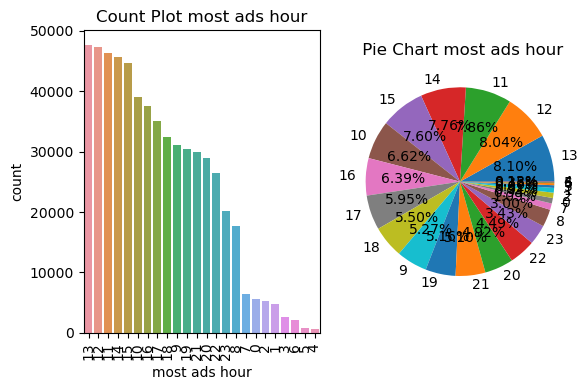

In [20]:
variable = 'most ads hour'
plt.figure(figsize=(6,4))


# Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df, order=df['most ads hour'].value_counts().index)
plt.title(f'Count Plot {variable}')
plt.xticks(rotation=90)

# Pie Chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f' Pie Chart {variable}')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

#### 6) Mostre a distribuição do total ads

#### Respondendo Graficamente

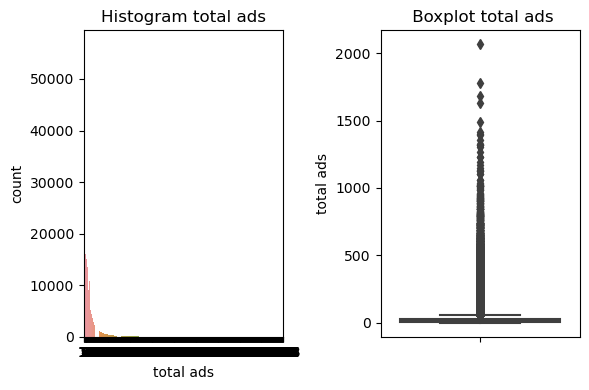

In [21]:
variable = 'total ads'
plt.figure(figsize=(6,4))

# Histogram
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df)
plt.title(f'Histogram {variable}')

# Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f' Boxplot {variable}')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

### *Vemos que os gráficos que não são bem legíveis, vamos utilizar a função .describe() para entendermos melhor o que está acontecendo, pois temos a impressão de existirem outliers para deixarem os gráficos desta forma*

### Estatística dos dados

In [22]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

### *Vemos que 75% dos dados estão com total ads <= 27 , ou seja existem outliers em nossos dados como previsto*
Por isso vamos plotar o histograma e o boxplot com nosso filtro de total ads < 50

#### Histograma e Boxplot (total ads < 50)

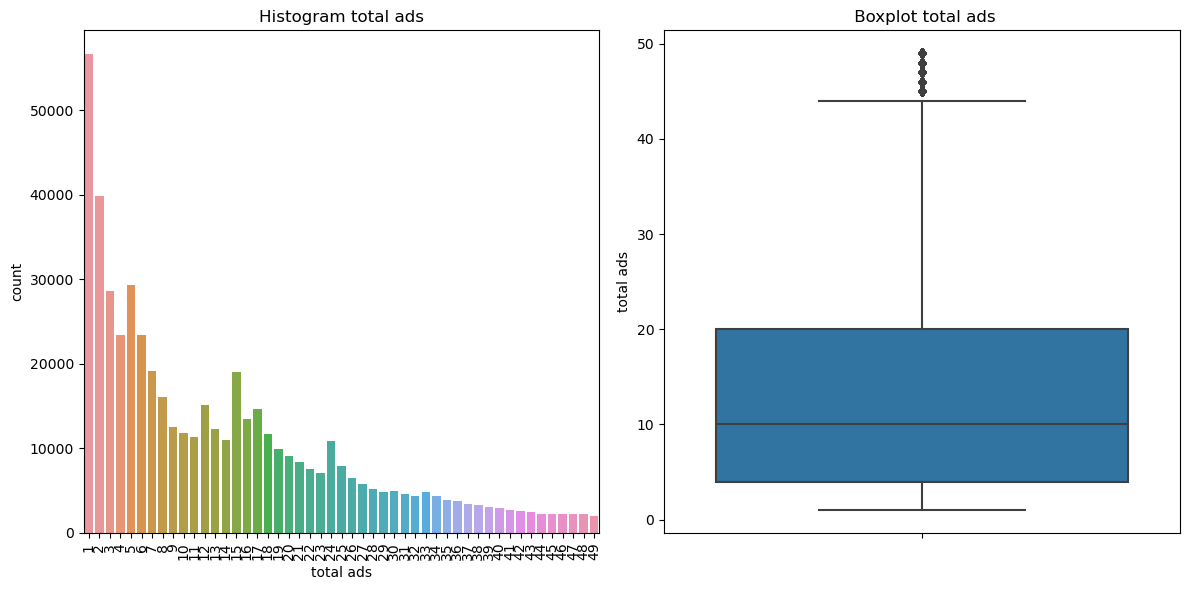

In [33]:
variable = 'total ads'
plt.figure(figsize=(12,6))

# Histogram
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df[df['total ads']<50])
plt.title(f'Histogram {variable}')
plt.xticks(rotation=90)

# Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df['total ads']<50])
plt.title(f' Boxplot {variable}')

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

**Histograma** - > Aqui pecebemos que a maioria das pessoas viu apenas 1 ad, um pouco menos de pessoas viu 2 e assim por diante, nos parece a princípio uma distribuição exponencial


**BoxPlot** - > Também removemos muitos outliers o que tornou mais legível nossos dados e sua distribuição


1º Quartil: Aproximadamente 4 (25% das pessoas viram aproximadamente 4 ou menos anúncios)

2º Quartil(Mediana): 10 (50% das pessoas viram 10 anúncios ou menos)

3º Quartil: 20 (75% das pessoas viram 20 ou menos anúncios)

#  Teste A/B

- Nesta etapa, vamos criar as tabelas cruzadas para o teste A/B
- Todas as tabelas terão a variável "converted" pois essa é nossa variável alvo em questão

### TEST GROUP X CONVERTED

converted      False     True 
test group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


<Axes: xlabel='test group'>

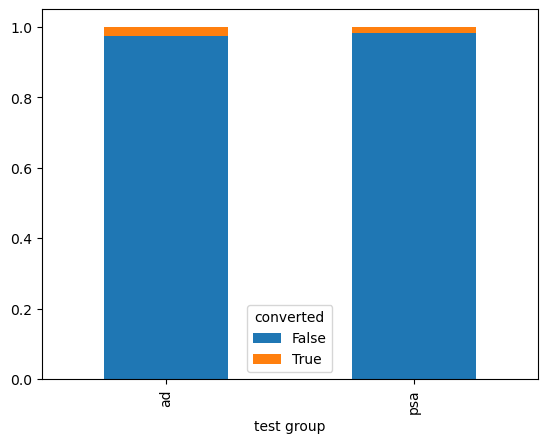

In [34]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
print(ct_conversion_test_group.sort_values(by=True, ascending=False))
ct_conversion_test_group.plot.bar(stacked=True)

# normalize='index' ->  normaliza por linha

### O grupo que recebeu anúncios comprou **0,76%** a mais proporcionalmente que o grupo de controle

### MOST ADS DAY X CONVERTED

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

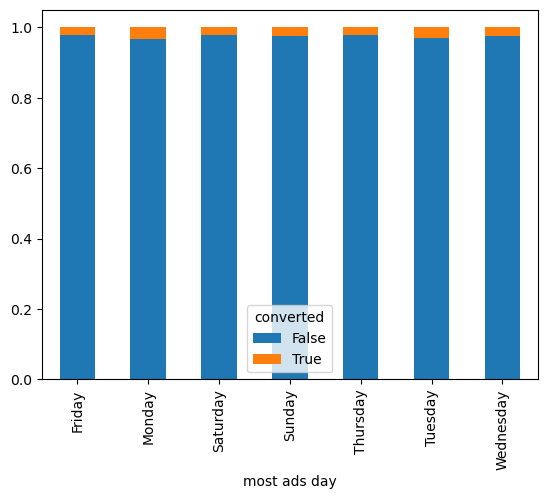

In [35]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked=True)

### O melhor dia para transformar anúncios em compras são **segunda-feira e terça-feira**

Com quase 1% de taxa de conversão a mais que os outros dias da semana

### MOST ADS HOUR X CONVERTED

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

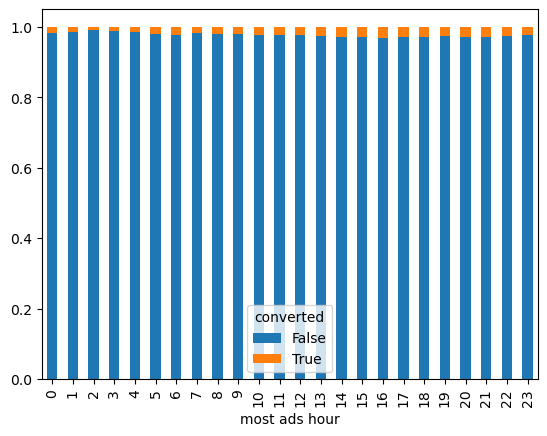

In [36]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True, ascending=False))
ct_conversion_hour.plot.bar(stacked=True)

#### O horário que apresentou melhores resultados de compras em função do número de anúncios vistos pelos clientes foi às **16h**

## Box Plot para taxas de conversão por número de ads

<Axes: xlabel='converted', ylabel='total ads'>

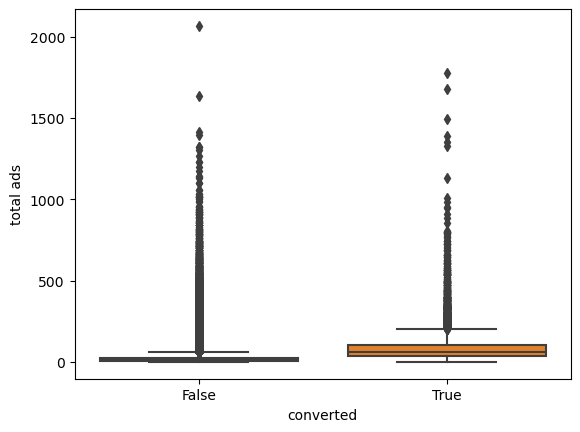

In [38]:
sns.boxplot(x = 'converted', y = 'total ads', data = df)

### Os gráficos não se apresentam muito legíveis em função da presença de outliers, tiveram pessoas que viram muitos ads, e não são representativos dos nossos dados, por isso vamos filtrar os dados para total ads < 50

## Box Plot (converted x total ads) (total ads < 50)

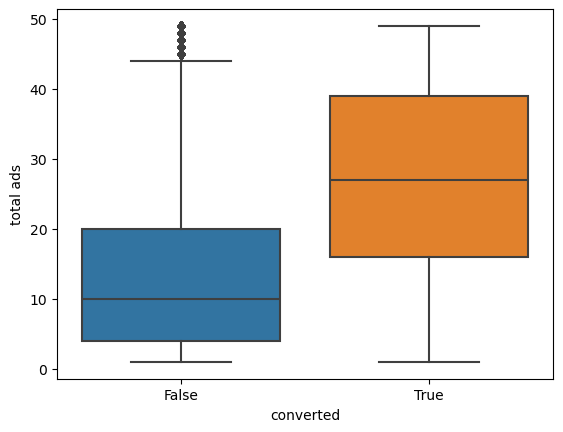

In [39]:
sns.boxplot(x ='converted', y = 'total ads', data=df[df['total ads']<50]);

#### Ainda não podemos dizer que os anúncios tem uma eficiência, apesar do gráfico, devemos realizar um teste qui-quadrado para provarmos que os anúncios tem relação com o fato da pessoa comprar produtos(converted)

## **TESTE QUI-QUADRADO**
- Comparam a relação entre variáveis categóricas, dizendo se ela existe ou não
- São melhor aproveitados para amostras que apresentam seus dados com distribuição normal, pois utiliza a média como tomada de decisão
- Em função da presença de muitos outliers já podemos prever que nossas amostras não seguem uma distribuição normal, sendo mais indicando a realização de um teste não paramétrico, no entanto continuaremos a utilizar este mesmo teste e tomaremos a decisão de forma independente, ele servirá apenas como um indicador

In [53]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df.columns:
    if variable != 'converted':
        contingency_table = pd.crosstab(df[variable], df['converted'])

        chi2, p, dof, expfreq = chi2_contingency(contingency_table)

        print('')
        print(f'Chi-squared test for {variable.upper()} vs CONVERTED:')
        print(f'Chi-squared value: {chi2:.2f}')
        print(f'p-value: {p:}')

        if p < alpha:
            print(f'Existe relação entre as variáveis {variable} e a taxa de conversão, rejeitando a hipótese nula.')
        else:
            print(f'Não existe relação entre as variáveis {variable} e a taxa de conversão, rejeitando a hipótese nula.')


Chi-squared test for TEST GROUP vs CONVERTED:
Chi-squared value: 54.01
p-value: 1.9989623063390075e-13
Existe relação entre as variáveis test group e a taxa de conversão, rejeitando a hipótese nula.

Chi-squared test for TOTAL ADS vs CONVERTED:
Chi-squared value: 48001.99
p-value: 0.0
Existe relação entre as variáveis total ads e a taxa de conversão, rejeitando a hipótese nula.

Chi-squared test for MOST ADS DAY vs CONVERTED:
Chi-squared value: 410.05
p-value: 1.932184379244731e-85
Existe relação entre as variáveis most ads day e a taxa de conversão, rejeitando a hipótese nula.

Chi-squared test for MOST ADS HOUR vs CONVERTED:
Chi-squared value: 430.77
p-value: 8.027629823696771e-77
Existe relação entre as variáveis most ads hour e a taxa de conversão, rejeitando a hipótese nula.


### O resultado dos testes nos indicam que existem sim uma relação entre: 

(TEST GROUP, MOST ADS DAY, MOST ADS HOU) com CONVERTED


OBS: o total ads é uma variável numérica contínua, não categorizada por isso ela não faz sentido ser utilizada neste teste

# CONCLUSÕES

- O **melhor dia** para enviar ads = Segunda-Feira
- O **melhor horário** para ads  = 16 horas
- O uso de ads nos mostrou um aumento de aproveitamento de vendas em **0.76%**
- O teste qui-quadrado mostrou que existe sim uma relação entre as variáveis, no entanto deve ser ainda comprovada com um teste não paramétrico

**Perguntas:**
- 0.76% representa um grande aumento dos lucros comparado com os gastos com o envio de ads?? Se sim, usar ads é indicado.